In [2]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox

In [2]:
def create_circular_mask(h, w, center=None, radius=None):
    center = (int(w/2), int(h/2))
    #if radius is None: # use the smallest distance between the center and image walls
    radius = min(center[0], center[1], w-center[0], h-center[1])
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

In [3]:
def load_image(filename):
    raw = tf.io.read_file(filename)
    image = tf.image.decode_png(raw, channels=3)
  # the `print` executes during tracing.
  #print("Initial shape: ", image.shape)
  #tf.image.resize(image, [128,128])
  #print("Final shape: ", image.shape)
    return image

In [4]:
s1 = 1536
s2 = 128
#"drive/MyDrive/cloud_dataset/train/train/" + train[0][0]
def preprocess_img(img_path,th=0.5,plot=False,s1=1536, s2=128):
    im = load_image(img_path)
    im = im.numpy()
    if(plot):
        plt.subplot(121)
        plt.imshow(im)
    mask = create_circular_mask(s1,s1)
    im[~mask] = 0
    ratio_rb = np.zeros((s1,s1))
    threshold = th
    ratio_rb = im[:,:,0]/im[:,:,2] > threshold
    ratio_rb = ratio_rb.astype(float)
    rr = np.expand_dims(ratio_rb,-1)
    imr = tf.image.resize(rr, [s2,s2])
    if(plot):
        plt.subplot(122)
        plt.imshow(imr.numpy()[:,:,0],'gray')
    return imr

In [3]:
trainx = []
trainy = []
for day in os.listdir("dataset/train_p"):
    temp = []
    for time in os.listdir("dataset/train_p/"+day):
        temp.append(day+'/'+time)
        #imr = preprocess_img("dataset/train/"+day+'/'+time,th=0.6)
    tdict = {}
    for t in temp:
        k = int(re.findall('\/(\d*)\.',t)[0])
        tdict[k] = t
    tt = []
    tdict_k = sorted(tdict)
    for v in tdict_k:
        tt.append(tdict[v])

    for i in range(0,len(tt),4):
        if(i+4<len(tt)):
            trainx.append(tt[i:i+3])
            trainy.append(tt[i+1:i+4])

In [13]:
?plt.imsave

In [11]:
?np.array

In [4]:
ds_x = []
ds_y = []
for seq in trainx:
    seq_ds = []
    for im in seq:
    #r = preprocess_img("drive/MyDrive/cloud_dataset/train/train/" + im,th=0.6)
    #print(r.shape)
        r = plt.imread("dataset/train_p/"+im)
        seq_ds.append(r)
    ds_x.append(seq_ds)4

for seq in trainy:
    seq_ds = []
    for im in seq:
        #r = preprocess_img("drive/MyDrive/cloud_dataset/train/train/" + im,th=0.6)
    #print(r.shape)
        r = plt.imread("dataset/train_p/"+im)
        seq_ds.append(r)
    ds_y.append(seq_ds)

ds_x = np.array(ds_x)
ds_y = np.array(ds_y)
ds_x.shape, ds_y.shape

((6087, 3, 128, 128, 3), (6087, 3, 128, 128, 3))

In [5]:
n = ds_x.shape[0]
import random
val_p = n*0.2
random.seed(100)
val_set = random.sample(range(n),int(val_p))
train_x = []
train_y = []
val_x = []
val_y = []
for i in range(n):
    if i in val_set:
        val_x.append(ds_x[i])
        val_y.append(ds_y[i])
    else:
        train_x.append(ds_x[i])
        train_y.append(ds_y[i])

train_x = np.array(train_x)
train_y = np.array(train_y)
val_x = np.array(val_x)
val_y = np.array(val_y)
print(train_x.shape,train_y.shape,val_x.shape,val_y.shape)

(4870, 3, 128, 128, 3) (4870, 3, 128, 128, 3) (1217, 3, 128, 128, 3) (1217, 3, 128, 128, 3)


In [31]:
train_x = tf.image.rgb_to_grayscale(np.array(train_x))
train_y = tf.image.rgb_to_grayscale(np.array(train_y))
val_x = tf.image.rgb_to_grayscale(np.array(val_x))
val_y = tf.image.rgb_to_grayscale(np.array(val_y))
print(train_x.shape,train_y.shape,val_x.shape,val_y.shape)

(4870, 3, 128, 128, 1) (4870, 3, 128, 128, 1) (1217, 3, 128, 128, 1) (1217, 3, 128, 128, 1)


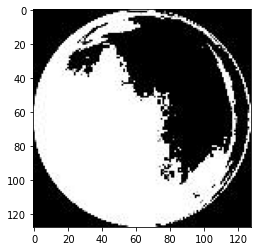

In [25]:
im = plt.imread("dataset/train_p/0104/0104075000.JPG")
plt.imshow(im)

In [34]:
np.unique(train_x[0][0])

array([0.        , 0.00392118, 0.00784235, 0.01176353, 0.01568471,
       0.01960588, 0.02352706, 0.02744824, 0.03136941, 0.03529059,
       0.03921176, 0.04313294, 0.04705412, 0.0509753 , 0.05489647,
       0.05881765, 0.06273883, 0.06666001, 0.07058118, 0.07450236,
       0.07842353, 0.08234471, 0.08626588, 0.09018706, 0.09410824,
       0.09802942, 0.10195059, 0.10587177, 0.10979295, 0.11371412,
       0.1176353 , 0.12155648, 0.12547766, 0.13332002, 0.14116237,
       0.15292589, 0.15684706, 0.17645293, 0.19213766, 0.19998001,
       0.20782235, 0.21174355, 0.21566471, 0.2195859 , 0.22742824,
       0.23134942, 0.2352706 , 0.23919177, 0.24703412, 0.25095531,
       0.25487649, 0.25879768, 0.26271886, 0.27056122, 0.27448237,
       0.28232473, 0.29016709, 0.29800943, 0.30585179, 0.31369412,
       0.3176153 , 0.32545766, 0.32937884, 0.38427532, 0.40388119,
       0.41172355, 0.41956592, 0.43132943, 0.43525061, 0.43917179,
       0.44701415, 0.45093533, 0.45485649, 0.46269885, 0.46662

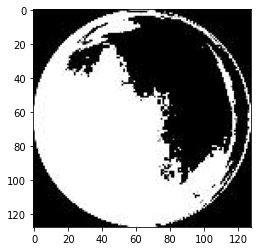

In [30]:
converted = tf.image.rgb_to_grayscale(im)
plt.imshow(converted[:,:,0],'gray')

In [ ]:
converted.shape

In [35]:
#Convolutional LSTM model
inp = layers.Input(shape=(None, *train_x.shape[2:]))
#inp = tf.keras.layers.Rescaling(1./255)(inp)

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inp)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same")(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

In [37]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=3)

# Define modifiable training hyperparameters.
epochs = 1
batch_size = 15


checkpoint_path = "dataset/training_lstm/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1, save_best_only=True)



# Fit the model to the training data.
model.fit(
    train_x,
    train_y,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(val_x,val_y),
    callbacks=[early_stopping, reduce_lr],
)

325/325 [==============================] - 16693s 51s/step - loss: -2069816832.0000 - val_loss: 17440694.0000


In [ ]:
?tf.keras.callbacks.ModelCheckpoint

In [38]:
tf.keras.models.save_model(model, 'dataset/training_lstm')

INFO:tensorflow:Assets written to: dataset/training_lstm\assets
